# Planning the Project
### The Covid-19 event has been a very troubling time for all of us around the world. Due to this, I plan to use this project to conduct a study on the amount of people getting vaccinated and leverage off fear that some people have about the virus. With this I hope to share this with family members and close friends that getting fully vaccinated is one step closer to helping combat the virus.

## Questions worth discovering
#### - How has the Covid Vaccination Process progressed throughout the year?
#### - What does the total vaccination progress for certain countries look like? i.e U.S, Mexico, Canada, China, UK, etc.
#### -What does the daily vaccination progress look like for certain countries?

## Loading in libraries/modules

In [39]:
#imports all the libraries needed for the data cleaning and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [40]:
#Reads in the csv file and puts the data in a dataframe
vaccine_data = pd.read_csv('country_vaccinations.csv')

## Data Pre-Processing
### Getting a glimpse of the data

In [41]:
#Gives a quick description of the data
vaccine_data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.487200e+04,3.338700e+04,3.077400e+04,2.840500e+04,6.596400e+04,34872.000000,33387.000000,30774.000000,65964.000000
mean,3.357830e+07,1.342228e+07,9.778293e+06,2.772051e+05,1.364650e+05,62.694791,34.968768,28.674557,3495.352996
std,1.730459e+08,5.276935e+07,3.831746e+07,1.273848e+06,8.208942e+05,56.275645,27.648268,26.033862,4160.725120
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.925522e+05,2.778055e+05,1.656195e+05,5.371000e+03,1.005000e+03,10.210000,7.720000,4.202500,679.000000
50%,2.563082e+06,1.639806e+06,1.140760e+06,2.631000e+04,7.712000e+03,48.125000,31.580000,21.490000,2280.500000
75%,1.207973e+07,6.512414e+06,5.444750e+06,1.272430e+05,4.436100e+04,108.822500,60.290000,51.717500,5080.000000
max,2.769530e+09,1.225000e+09,1.193466e+09,2.474100e+07,2.242429e+07,321.000000,122.180000,118.860000,117497.000000


In [42]:
#checks the shape of the data 
vaccine_data.shape

(66330, 15)

In [43]:
#Prints the first few rows from the dataset
vaccine_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


In [44]:
vaccine_data['country'].value_counts()

Denmark             389
Latvia              388
Norway              387
China               377
Canada              377
                   ... 
Saint Helena         92
Pitcairn             85
Falkland Islands     67
Burundi              66
Niue                 43
Name: country, Length: 223, dtype: int64

In [45]:
#Shows percentage of how many missing values are in each column.
vaccine_data.isnull().sum() / vaccine_data.shape[0]

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.474265
people_vaccinated                      0.496653
people_fully_vaccinated                0.536047
daily_vaccinations_raw                 0.571762
daily_vaccinations                     0.005518
total_vaccinations_per_hundred         0.474265
people_vaccinated_per_hundred          0.496653
people_fully_vaccinated_per_hundred    0.536047
daily_vaccinations_per_million         0.005518
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

## Data Cleaning 
### Creating new dataframes with subdata for different topics of interest

In [46]:
#Drops the missing values in the dataframe
clean_vaccine_data = vaccine_data.dropna()

#Checks to see if the above line worked (it did)
clean_vaccine_data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [47]:
#This line puts two columns in dataframe and drops rows with NA values.
sub_data = clean_vaccine_data[["country","date","total_vaccinations"]]

print(sub_data.head(5))

         country        date  total_vaccinations
94   Afghanistan  2021-05-27            593313.0
101  Afghanistan  2021-06-03            630305.0
318      Albania  2021-02-18              3049.0
400      Albania  2021-05-11            622507.0
401      Albania  2021-05-12            632676.0


In [48]:
#Double checks to see if sub dataframe was done correctly
sub_data.isnull().sum()

country               0
date                  0
total_vaccinations    0
dtype: int64

In [49]:
#Double checks the shape of the subset dataframe 
sub_data.shape

(24759, 3)

In [50]:
#Subsets United States data from the original data set.
US_data = sub_data.loc[sub_data["country"] == "United States"]
#prints the subset data frame to prepare for plotting
US_data

,country,date,total_vaccinations
63203,United States,2020-12-14,28547.0
63204,United States,2020-12-15,77567.0
63205,United States,2020-12-16,236843.0
63206,United States,2020-12-17,508232.0
63207,United States,2020-12-18,922368.0
...,...,...,...
63573,United States,2021-12-19,497402001.0
63574,United States,2021-12-20,498963090.0
63575,United States,2021-12-21,500063936.0
63576,United States,2021-12-22,500222328.0


In [51]:
#changes the total_vaccinations column from string elements to integer elements.
pd.to_numeric(US_data["total_vaccinations"])

63203        28547.0
63204        77567.0
63205       236843.0
63206       508232.0
63207       922368.0
            ...     
63573    497402001.0
63574    498963090.0
63575    500063936.0
63576    500222328.0
63577    500222330.0
Name: total_vaccinations, Length: 375, dtype: float64

## Creating Visuals to represent data

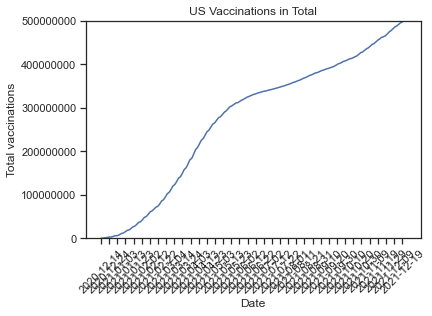

In [52]:
#Plots the graph of US Total Vaccinations. 
#MATPLOTLIB GRAPH

x = US_data["date"]
y = US_data["total_vaccinations"]

plt.plot(x,y)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 10), rotation = 45)
plt.ylim(0,max(y))
plt.title("US Vaccinations in Total")
plt.xlabel("Date")
plt.ylabel("Total vaccinations")

plt.show()

Text(0, 0.5, 'Total Vaccinations')

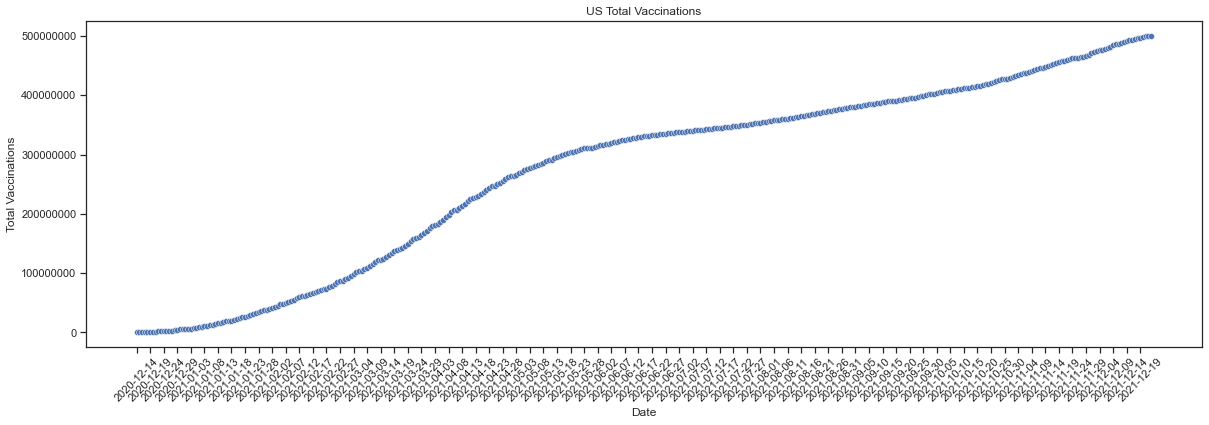

In [53]:
#SEABORN GRAPH

plt.figure(figsize = (20,6))
plt.title("US Total Vaccinations")
sns.scatterplot(x = US_data['date'], y = US_data['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [54]:
list(vaccine_data.columns)

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

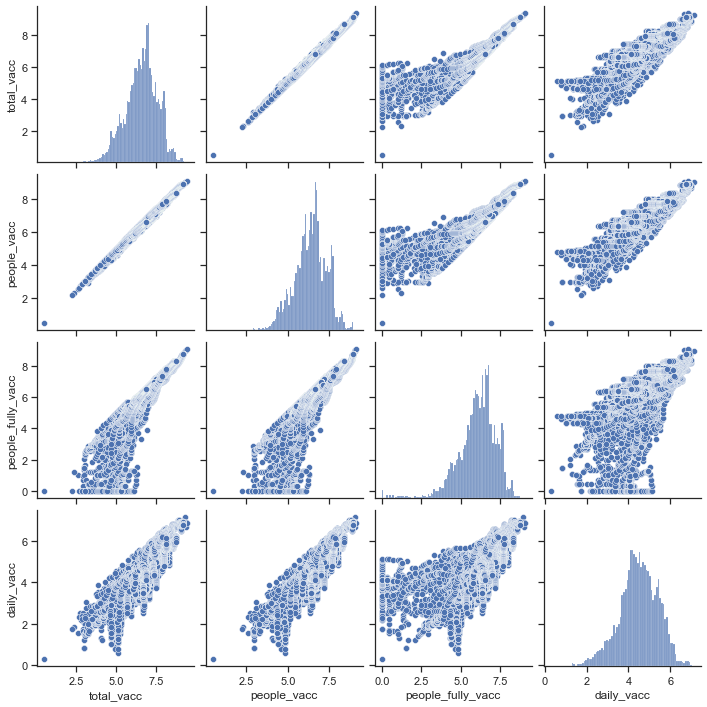

In [55]:
#Plotting scatterplot matrix using Seaborn 
#create dataframe with important features.
clean_vaccine_data['total_vacc'] = np.log10(clean_vaccine_data['total_vaccinations'])
clean_vaccine_data['people_vacc'] = np.log10(clean_vaccine_data['people_vaccinated'])
clean_vaccine_data['people_fully_vacc'] = np.log10(clean_vaccine_data['people_fully_vaccinated'])
clean_vaccine_data['daily_vacc'] = np.log10(clean_vaccine_data['daily_vaccinations'])

#drop the original nontransformed columns
clean_vaccine_data = clean_vaccine_data.drop(columns = ['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations'])


covid_features = clean_vaccine_data[['date', 'total_vacc', 'people_vacc' , 'people_fully_vacc' , 'daily_vacc']]
sns.set_theme(style="ticks")
sns.pairplot(covid_features)


In [56]:
#Plotting scatterplot matrix with pandas.plotting 
# *NOTE* 
#This plot gives an error in kaggle. Leave this uncommented until further fix.

#plot = pd.plotting.scatter_matrix(covid_features)

In [57]:
# Lets us see which countries we can pick to make a world progress map
list(clean_vaccine_data.country.unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Isle of Man',
 'Isr

In [58]:
#Subsets United States data from the original data set.
US_data = sub_data.loc[sub_data["country"] == "United States"]

#Subsets Mexico data from the original data set.
Mexico_data = sub_data.loc[sub_data["country"] == "Mexico"]

#Subsets Canada data from the original data set.
Canada_data = sub_data.loc[sub_data["country"] == "Canada"]

#Subsets UK data from the original data set.
UK_data = sub_data.loc[sub_data["country"] == "United Kingdom"]

#Subsets China data from the original data set.
China_data = sub_data.loc[sub_data["country"] == "China"]

#Subsets India data from the original data set.
India_data = sub_data.loc[sub_data["country"] == "India"]

In [59]:
# Combines all the 5 countries' data into one dataframe (vertically/row wise)
world_countries = pd.concat([US_data, Mexico_data, Canada_data, UK_data, China_data, India_data], axis = 0)

# a quick check to see if selected 3 columns are present and 5 countires are present in the country column
#world_countries['country'].unique()
#world_countries.columns


## With close inspectation we see that there is are few data points for China. This would mean further analysis of the data should be done to discover why China does not have a steady line present like the other countries. One assumption would be that the data was not provided.

Text(0, 0.5, 'Total Vaccinations')

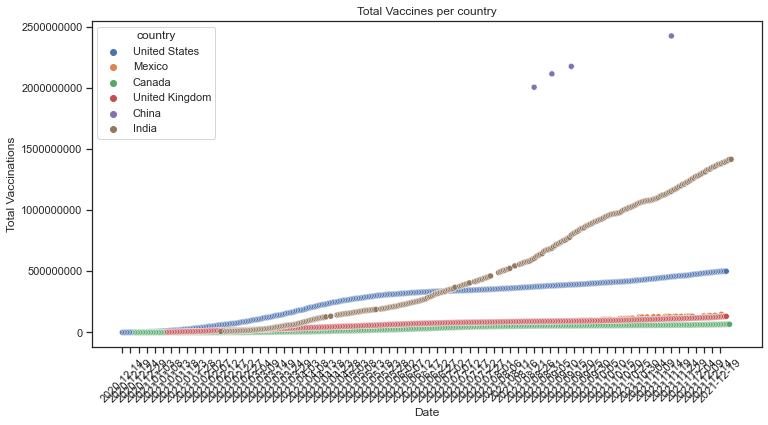

In [60]:
# Scatterplot
plt.figure(figsize = (12,6))
plt.title("Total Vaccines per country")
sns.scatterplot(x = world_countries['date'], y = world_countries['total_vaccinations'], hue = world_countries['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
#plt.legend()

In [61]:
#checks to see how many data points are in the China dataframe in the date column
len(China_data['date'])

4

In [62]:
temp = vaccine_data.loc[vaccine_data['country'] == 'China']
temp_data = temp[['date', 'country', 'total_vaccinations']]
temp_data.isnull().sum()
temp_data.shape

(377, 3)

Text(0, 0.5, 'Total Vaccinations')

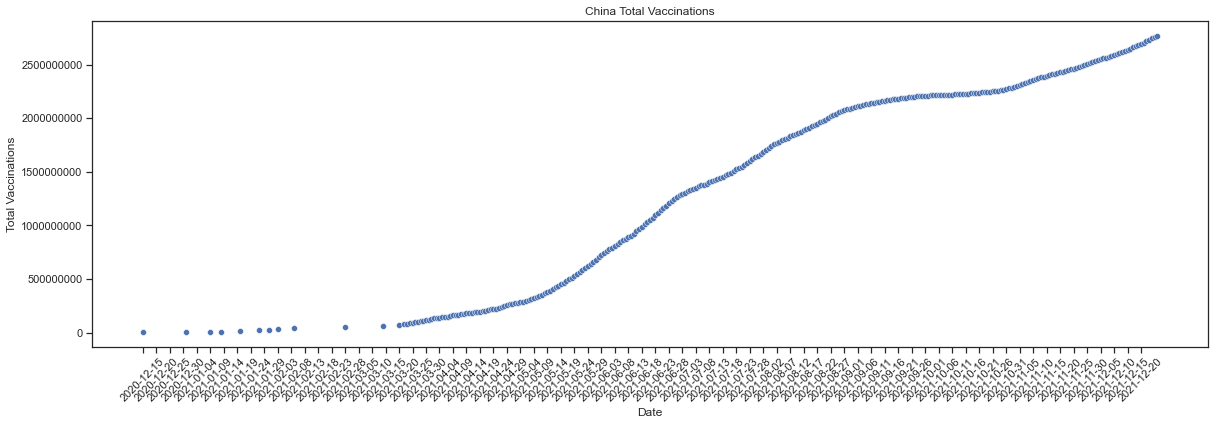

In [63]:
plt.figure(figsize = (20,6))
plt.title("China Total Vaccinations")
sns.scatterplot(x = temp_data['date'], y = temp_data['total_vaccinations'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [64]:
# Combines all the 5 countries' data into one dataframe (vertically/row wise)
world_countries = pd.concat([US_data, Mexico_data, Canada_data, UK_data, temp_data, India_data], axis = 0)
world_countries.head()

,country,date,total_vaccinations
63203,United States,2020-12-14,28547.0
63204,United States,2020-12-15,77567.0
63205,United States,2020-12-16,236843.0
63206,United States,2020-12-17,508232.0
63207,United States,2020-12-18,922368.0


Text(0, 0.5, 'Total Vaccinations')

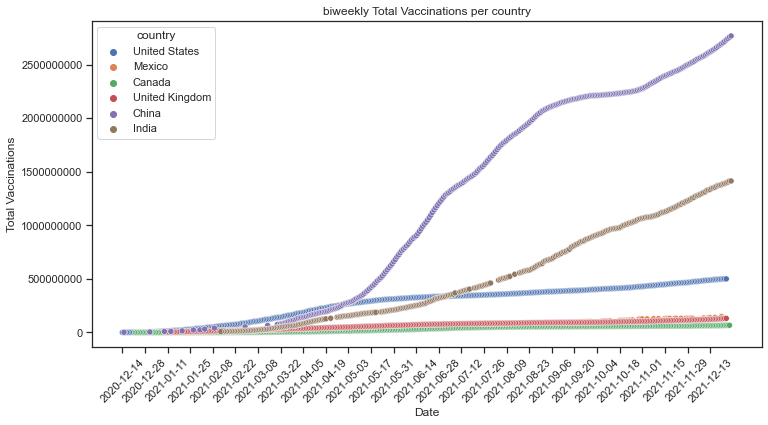

In [65]:
# Scatterplot of Bi
plt.figure(figsize = (12,6))
plt.title("biweekly Total Vaccinations per country")
sns.scatterplot(x = world_countries['date'], y = world_countries['total_vaccinations'], hue = world_countries['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 14), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

In [66]:
from sklearn.model_selection import  train_test_split
df = world_countries.copy()
df = df[df['country'] != 'China']

number = preprocessing.LabelEncoder()
df['date'] = number.fit_transform(df.date)

In [67]:
X_train, X_test, y_train, y_test=train_test_split(df.drop('country',axis=1),df['country'],test_size=0.2,stratify=df['country'])

## RandomForest Classification

In [30]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)
ypred_rf=model_rf.predict(X_test)
confusion_matrix(y_test,ypred_rf)

array([[74,  0,  0,  0,  0],
       [ 0, 55,  0,  2,  2],
       [ 7,  0, 42,  3,  0],
       [ 0,  0,  0, 70,  0],
       [ 0,  0,  0,  0, 75]], dtype=int64)

Text(30.5, 0.5, 'Actual')

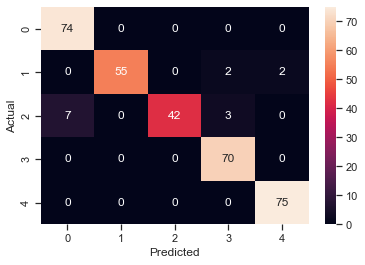

In [31]:
sns.heatmap(confusion_matrix(y_test,ypred_rf),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [32]:
print(classification_report(y_test,ypred_rf))

                precision    recall  f1-score   support

        Canada       0.91      1.00      0.95        74
         India       1.00      0.93      0.96        59
        Mexico       1.00      0.81      0.89        52
United Kingdom       0.93      1.00      0.97        70
 United States       0.97      1.00      0.99        75

      accuracy                           0.96       330
     macro avg       0.96      0.95      0.95       330
  weighted avg       0.96      0.96      0.96       330



##  Logistic Regression

In [33]:
model_lr=LogisticRegression(solver='liblinear')
model_lr.fit(X_train,y_train)
ypred_lr=model_lr.predict(X_test)
confusion_matrix(y_test,ypred_lr)

array([[ 0,  0,  0,  0, 74],
       [ 0, 39,  0,  0, 20],
       [ 0,  0,  0,  0, 52],
       [ 0,  0,  0,  0, 70],
       [ 0, 31,  0,  0, 44]], dtype=int64)

Text(30.5, 0.5, 'Actual')

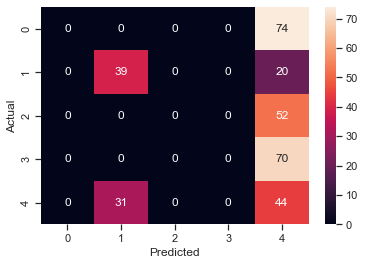

In [34]:
sns.heatmap(confusion_matrix(y_test,ypred_lr),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [35]:
print(classification_report(y_test,ypred_lr))

                precision    recall  f1-score   support

        Canada       0.00      0.00      0.00        74
         India       0.56      0.66      0.60        59
        Mexico       0.00      0.00      0.00        52
United Kingdom       0.00      0.00      0.00        70
 United States       0.17      0.59      0.26        75

      accuracy                           0.25       330
     macro avg       0.15      0.25      0.17       330
  weighted avg       0.14      0.25      0.17       330



## DecisionTreeclassifier

In [36]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
ypred_dt=model_dt.predict(X_test)
confusion_matrix(y_test,ypred_dt)

array([[70,  0,  4,  0,  0],
       [ 0, 52,  0,  5,  2],
       [ 8,  0, 42,  2,  0],
       [ 0,  1,  0, 68,  1],
       [ 0,  3,  0,  2, 70]], dtype=int64)

Text(30.5, 0.5, 'Actual')

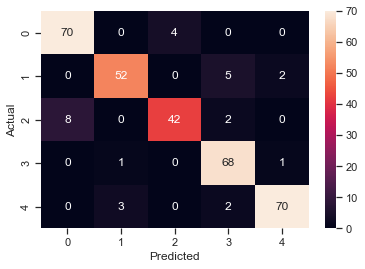

In [37]:
sns.heatmap(confusion_matrix(y_test,ypred_dt),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [38]:
print(classification_report(y_test,ypred_dt))

                precision    recall  f1-score   support

        Canada       0.90      0.95      0.92        74
         India       0.93      0.88      0.90        59
        Mexico       0.91      0.81      0.86        52
United Kingdom       0.88      0.97      0.93        70
 United States       0.96      0.93      0.95        75

      accuracy                           0.92       330
     macro avg       0.92      0.91      0.91       330
  weighted avg       0.92      0.92      0.91       330

